In [ ]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re #regular expression
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
consumerKey = 'FIKIk9765mOgxYV86tBhRviu1'
consumerSecret = 'gVSiUWUOVCyCm5HBu0YY1Q7vr7Us8mRgeBh5ixZ3kB1TqkCtVG'
accessToken = '1395621591468306433-yB2Xj0dUtCl60iYDspEjq2eBuGubwW'
accessSecret = 'ssfp9kpkDkxNlyHjlVZL0uSIqxVrJ1hKnURwbKyOBpUEu'

In [ ]:
#Creating Authenication Object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret)

#set the acess token and access token secret
authenticate.set_access_token(accessToken, accessSecret)

#create the API object passing the auth information
api = tweepy.API(authenticate, wait_on_rate_limit= True)

In [ ]:
#Extract 100 tweets from the tweeter user
posts = api.user_timeline(screen_name = 'BillGates', count = 100, lang = 'en', tweet_mode='extended')

#print last five tweets from the account
print("Show the 5 recent tweets:\n")
i=1
for tweets in posts[0:5]:
  print(str(i)+')'+tweets.full_text + '\n')
  i+=1

Show the 5 recent tweets:

1)RT @gatesfoundation: As our CEO @MSuzman says, no barriers should stand in the way of equitable access to vaccines. We are supportive of a…

2)https://t.co/padmHSgWGc

3)RT @WHO: The @ACTAccelerator, an unprecedented global alliance to develop &amp; deliver the tests, treatments &amp; vaccines the 🌐 needs to fight #…

4)I was honored to speak at today’s #LeadersClimateSummit about the three things we need to do to avoid a climate disaster. https://t.co/0YJJyabeIn

5)Ambitious short-term goals like this are critical to moving closer to a net-zero future. As we rapidly scale the solutions we have, we must also invest in innovation to reach our ultimate goals. Thank you @POTUS for your leadership. https://t.co/SVeKp1KPHT



In [ ]:
#Creating a dataframe
df = pd.DataFrame([tweet.full_text for tweet in posts],columns=['Tweets'])

#Show the first five rows of data
df.head()

,Tweets
0,"RT @gatesfoundation: As our CEO @MSuzman says,..."
1,https://t.co/padmHSgWGc
2,"RT @WHO: The @ACTAccelerator, an unprecedented..."
3,I was honored to speak at today’s #LeadersClim...
4,Ambitious short-term goals like this are criti...


In [ ]:
#Cleaning data

#create a function to clean the tweets
def cleanTxt(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', text)
  text = re.sub(r'#','',text)
  text = re.sub(r'RT[\s]+','',text)
  text = re.sub(r'https?:\/\/\S+','',text)

  return(text)

df['Tweets'] = df['Tweets'].apply(cleanTxt)

#Printing clean txt

df

,Tweets
0,": As our CEO says, no barriers should stand i..."
1,.co/padmHSgWGc
2,": The , an unprecedented global alliance to de..."
3,I was honored to speak at today’s LeadersClima...
4,Ambitious short-term goals like this are criti...
...,...
95,Standing up for science has never been more im...
96,I've known and learned from for more than 40 ...
97,This book has nothing to do with viruses or pa...
98,Monoclonal antibodies are one of the most prom...


In [ ]:
#create a function to get the subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

#creat a function to get the polarity
def getPolarity(text):
  return(TextBlob(text).sentiment.polarity)

#create two columns
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

#show the new dataframe with the new columns
df

,Tweets,Subjectivity,Polarity
0,": As our CEO says, no barriers should stand i...",1.000000,0.500000
1,.co/padmHSgWGc,0.000000,0.000000
2,": The , an unprecedented global alliance to de...",0.450000,0.300000
3,I was honored to speak at today’s LeadersClima...,0.000000,0.000000
4,Ambitious short-term goals like this are criti...,0.668750,0.062500
...,...,...,...
95,Standing up for science has never been more im...,0.750000,0.450000
96,I've known and learned from for more than 40 ...,0.550000,0.425000
97,This book has nothing to do with viruses or pa...,0.966667,0.600000
98,Monoclonal antibodies are one of the most prom...,0.525714,0.222857


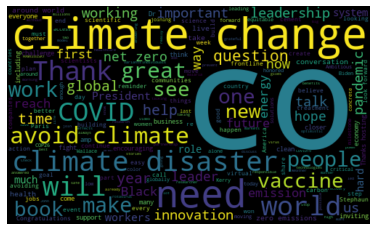

In [ ]:
#Plot Word cloud
allWords = ' '.join([tweets for tweets in df['Tweets']])
wordCloud = WordCloud(width = 500, height=300, random_state = 21, max_font_size = 199).generate(allWords)

plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
#create a function to compute the negative neutral and positive analysis

def getAnalysis(score):
  if score < 0:
    return('Negative')
  elif score == 0:
    return('Neutral')
  else :
    return ('Positive')

df['Analysis'] = df['Polarity'].apply(getAnalysis)

#show the data frame
df

,Tweets,Subjectivity,Polarity,Analysis
0,": As our CEO says, no barriers should stand i...",1.000000,0.500000,Positive
1,.co/padmHSgWGc,0.000000,0.000000,Neutral
2,": The , an unprecedented global alliance to de...",0.450000,0.300000,Positive
3,I was honored to speak at today’s LeadersClima...,0.000000,0.000000,Neutral
4,Ambitious short-term goals like this are criti...,0.668750,0.062500,Positive
...,...,...,...,...
95,Standing up for science has never been more im...,0.750000,0.450000,Positive
96,I've known and learned from for more than 40 ...,0.550000,0.425000,Positive
97,This book has nothing to do with viruses or pa...,0.966667,0.600000,Positive
98,Monoclonal antibodies are one of the most prom...,0.525714,0.222857,Positive


In [ ]:
#print all of the positive tweets
j=1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
  if (sortedDF['Analysis'][i] == 'Positive'):
    print(str(j)+')'+sortedDF['Tweets'][i])
    print()
    j+=1

1): As our CEO  says, no barriers should stand in the way of equitable access to vaccines. We are supportive of a…

2): The , an unprecedented global alliance to develop &amp; deliver the tests, treatments &amp; vaccines the 🌐 needs to fight …

3)Ambitious short-term goals like this are critical to moving closer to a net-zero future. As we rapidly scale the solutions we have, we must also invest in innovation to reach our ultimate goals. Thank you  for your leadership. .co/SVeKp1KPHT

4)It’s encouraging to see  Biden and  Kerry re-establish America’s leading role on climate change. I look forward to joining leaders from around the world to talk about some of the most important challenges we need to overcome to avoid a climate disaster. .co/a9CXZzIg6Y

5)Yesterday's verdict was a step in the right direction. But one court ruling alone will not bring to an end the injustice and inequity that Black people experience daily.  I hope we will continue to make real progress on this.

6)“Time” 

In [ ]:
#print negative tweets
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending='False')
for i in range(0, sortedDF.shape[0]):
  if (sortedDF['Analysis'][i] == 'Negative'):
    print(str(j)+')'+sortedDF['Tweets'][i])
    print()
    j+=1

1)Communities of color have been hit hard by COVID-19. One of the reasons why parts of the medical system often fail Black and brown people is because it’s not designed with them in mind. Dr. Stephaun Wallace wants to change that. .co/VIaM9385bv

2)Dr. Stephaun Wallace () has spent the last year helping make COVID-19 vaccines work for everybody. Stephaun and his colleagues at  are working to reach the people who are usually left behind. .co/7wqSeT3DJN

3)It’s deeply unfair that the people who contribute the least to climate change will suffer the worst from its effects: .co/XciR3lIVzs .co/Y2do5GhsGx

4): Over the past few weeks health workers in Ethiopia 🇪🇹, Nigeria 🇳🇬, Sudan 🇸🇩 and the Philippines 🇵🇭 were vaccinated against COVI…

5)For decades, Australian researcher Ruth Bishop led global efforts to identify and combat rotavirus. Her life is a reminder of the importance of scientific research to uncover unknown pathogens and the power of vaccines to prevent suffering and save lives. 

In [ ]:
#printing neutral tweets
j=1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
  if (sortedDF['Analysis'][i] == 'Neutral'):
    print(str(j)+')'+sortedDF['Tweets'][i])
    print()
    j+=1

1).co/padmHSgWGc

2)I was honored to speak at today’s LeadersClimateSummit about the three things we need to do to avoid a climate disaster. .co/0YJJyabeIn

3)Cement is responsible for 6% of carbon emissions globally. To get to net-zero by 2050, we need innovations to decarbonize the material. I discuss a few approaches to make low-emission cement in my climate book: .co/Ok1p3xQir4

4)Here are five things you should know if you want to understand how variants are (and aren’t) complicating the pandemic. .co/rANiDcZynJ

5): 💡 From climateadaptation to genderequality, discover ’s 50 years of innovations that changed the world 🌎 🎉: .co…

6): It's WorldTBDay

Even as we battle COVID19, we must not ease up the fight against Tuberculosis, which remains the 🌎🌍🌏’s deadlie…

7)I’m answering your questions now on : .co/HXMsI0lSK1 .co/XG7eAMNrGM

8)After you finish your pancakes this morning, come ask me anything on  at 11:15 Pacific Time: .co/R3wfDhtqxD .co/fAPRPUWQtu

9): Speaking from villages,

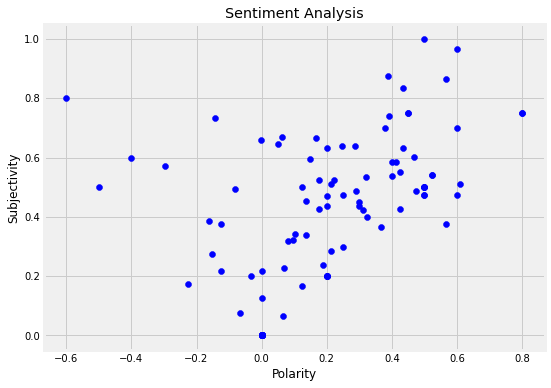

In [ ]:
#plotting the polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0,df.shape[0]):
  plt.scatter(df['Polarity'][i],df['Subjectivity'][i],color='Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()


In [ ]:
#Get the percentage of positive Tweets
ptweets=df[df.Analysis=='Positive']
positive_per  = ptweets.shape[0]*100/df.shape[0]
print("Percentage of positive tweets:",positive_per,"%")

Percentage of positive tweets: 69.0 %


In [ ]:
#Get the percentage of Negative Tweets
Ntweets=df[df.Analysis=='Negative']
Negative_per  = Ntweets.shape[0]*100/df.shape[0]
print("Percentage of Negative tweets:",Negative_per,"%")

Percentage of Negative tweets: 14.0 %


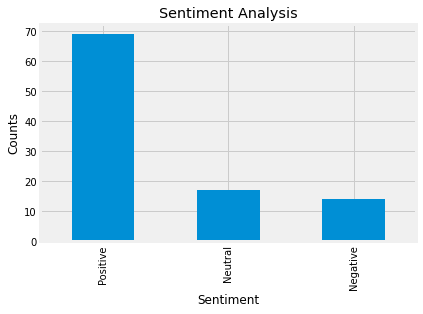

In [ ]:
#shows the value counts
df['Analysis'].value_counts()

#plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()